In [1]:
!pip install langchain-community
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 9.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
#Processando os dados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langchain.document_loaders import PyPDFLoader

def processar_pdf(pdf_path):
  loader = PyPDFLoader(pdf_path)
  document = loader.load()
  doc_string = """"""
  for doc in document:
    doc_string += doc.page_content
  return doc_string


disciplinas = {}

provas = {2019 : [],
          2020 : [],
          2021 : [],
          2022 : [],
          2023 : []}

for ano in range(2019, 2024):
  for fase in range(1, 4):
    new_prova_fragmentada = ""
    if ano == 2019 and fase == 3:
      continue
    path = f"/content/drive/MyDrive/PROVAS PROCESSADAS/Parâmetros 1 e 3/Parâmetros 1 e 3 - OCHE{ano}[{fase}].pdf"
    prova = processar_pdf(path)
    prova_fragmentada = prova.split("Disciplinas  envolvidas:")
    for string in prova_fragmentada[:]:
      if string.startswith("Número"):
        prova_fragmentada.remove(string)
    for string in prova_fragmentada[:]:
      string_list = string.split("Justificativa: ")
      string_list.pop()
      new_prova_fragmentada += " ".join(string_list)


    provas[ano].append(new_prova_fragmentada)

for ano in range(2019, 2024):
  for i, prova in enumerate(provas[ano]):
    new_prova = prova.replace("  e  ", ",").replace("\n", ",").replace("     ", ",").replace("Artes", "Arte").replace("Ciências  Atmosféricas/Meteorologia", "Meteorologia").replace("Arte", "Artes")
    palavras = new_prova.split(",")
    for ind,palavra in enumerate(palavras):
      palavras[ind] = palavra.strip()
      if palavra.startswith("Ciências"):
        palavras[ind] = palavra.replace("  ", " ").split("  ")
      else:
        palavras[ind] = palavra.split("  ")
    new_palavras = []
    for lista_palavras in palavras:
      for palavra in lista_palavras:
        if palavra != "":
          new_palavras.append(palavra)
    if "" in new_palavras:
      new_palavras.remove("")
    provas[ano][i] = new_palavras[:]





In [22]:
for ano in range(2019, 2024):
  fases = {"fase1" : {},
         "fase2" : {},
         "fase3" : {}}
  for i, p in enumerate(provas[ano]):
    for disciplina in p:
      if disciplina in fases[f"fase{i+1}"]:
          fases[f"fase{i+1}"][disciplina] += 1
      else:
        fases[f"fase{i+1}"][disciplina] = 1
  disciplinas[ano] = fases.copy()

print(disciplinas)

{2019: {'fase1': {'História': 7, 'Geografia': 7, 'Sociologia': 12, 'Antropologia': 2, 'Cultura': 1, 'Filosofia': 7, 'Ciências Ambientais ': 1, 'Literatura': 1, 'Artes': 3}, 'fase2': {'História': 10, 'Sociologia': 10, 'Geografia': 7, 'Geologia': 1, 'Filosofia': 4, 'Literatura': 2, 'Artes': 3, 'Antropologia': 1, 'Cultura': 1, ' ': 1}, 'fase3': {}}, 2020: {'fase1': {'Sociologia': 10, 'Filosofia': 3, 'Cultura': 2, 'História': 6, 'Geografia': 5, 'Ecologia': 1, 'Literatura': 1, ' ': 1}, 'fase2': {'Sociologia': 10, 'Geografia': 5, 'Filosofia': 3, 'Literatura': 3, 'História': 7, 'Ambiente': 1, ' ': 1}, 'fase3': {'Sociologia': 9, 'Geografia': 6, 'Filosofia': 6, 'História': 6, 'Ciências Naturais': 1, 'Artes': 1, ' ': 1}}, 2021: {'fase1': {'Sociologia': 9, 'História': 6, 'Filosofia': 5, 'Comunicação': 1, 'Geologia': 1, 'Geomorfologia': 1, 'Paleontologia': 1, 'Geografia': 1, 'Literatura': 2, 'Artes': 1, ' ': 1}, 'fase2': {'História': 6, 'Sociologia': 10, 'Filosofia': 5, 'Artes': 2, 'Literatura': 2

In [39]:
#OCHE 2019

materias = ['História', 'Geografia', 'Sociologia', 'Filosofia', 'Literatura', 'Artes', 'Outras']

def preparar_dicionario(materias : list, dic : dict, ano : int, fase : int):
  new_dic = {}
  for materia, quantidade in dic[ano][f'fase{fase}'].items():
    if materia in materias:
      new_dic[materia] = quantidade
    else:
      if 'Outras' in new_dic:
        new_dic['Outras'] += quantidade
      else:
        new_dic['Outras'] = quantidade
  return new_dic



primeira_fase2019 = preparar_dicionario(materias, disciplinas, 2019, 1)
segunda_fase2019 = preparar_dicionario(materias, disciplinas, 2019, 2)
primeira_fase2020 = preparar_dicionario(materias, disciplinas, 2020, 1)
segunda_fase2020 = preparar_dicionario(materias, disciplinas, 2020, 2)
terceira_fase2020 = preparar_dicionario(materias, disciplinas, 2020, 3)
primeira_fase2021 = preparar_dicionario(materias, disciplinas, 2021, 1)
segunda_fase2021 = preparar_dicionario(materias, disciplinas, 2021, 2)
terceira_fase2021 = preparar_dicionario(materias, disciplinas, 2021, 3)
primeira_fase2022 = preparar_dicionario(materias, disciplinas, 2022, 1)
segunda_fase2022 = preparar_dicionario(materias, disciplinas, 2022, 2)
terceira_fase2022 = preparar_dicionario(materias, disciplinas, 2022, 3)
primeira_fase2023 = preparar_dicionario(materias, disciplinas, 2023, 1)
segunda_fase2023 = preparar_dicionario(materias, disciplinas, 2023, 2)
terceira_fase2023 = preparar_dicionario(materias, disciplinas, 2023, 3)


print(primeira_fase2019)
print(segunda_fase2019)

{'História': 7, 'Geografia': 7, 'Sociologia': 12, 'Outras': 4, 'Filosofia': 7, 'Literatura': 1, 'Artes': 3}
{'História': 10, 'Sociologia': 10, 'Geografia': 7, 'Outras': 4, 'Filosofia': 4, 'Literatura': 2, 'Artes': 3}


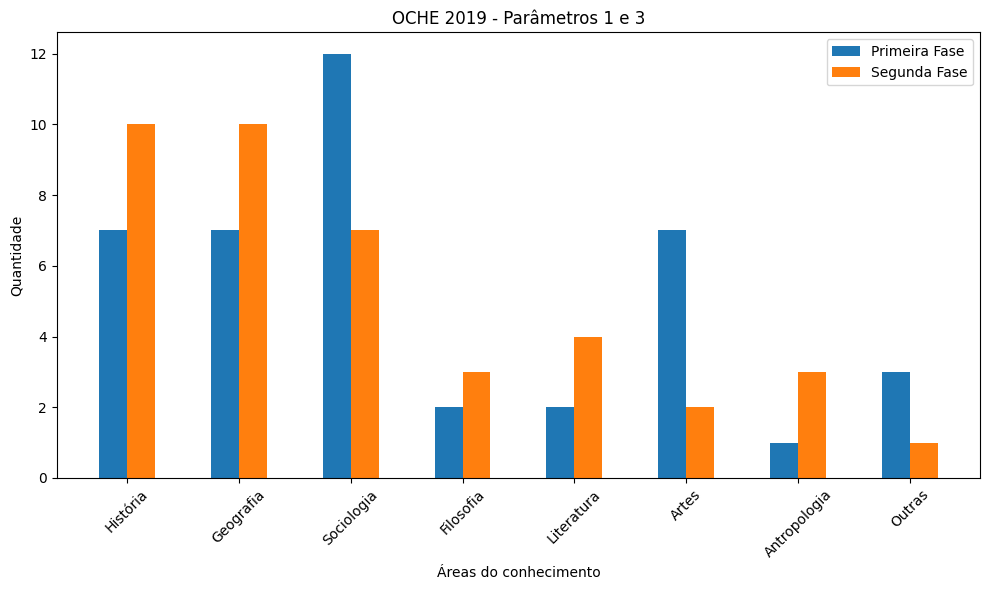

In [53]:
def plotar_grafico(fases : list, ano : int):
  materias = ['História', 'Geografia', 'Sociologia', 'Filosofia', 'Literatura', 'Artes','Outras']
  x = np.arange(len(materias))
  largura = 0.25  # agora temos 3 grupos
  plt.figure(figsize=(10, 6))  # ⬅️ aumenta o tamanho do gráfico

  # Ensure all dictionaries have the same keys in the same order
  fases_padded = []
  for fase_dict in fases:
      padded_dict = {materia: fase_dict.get(materia, 0) for materia in materias}
      fases_padded.append(padded_dict)

  if len(fases_padded) == 2:
    plt.bar(x - largura/2, list(fases_padded[0].values()), width=largura, label='Primeira Fase')
    plt.bar(x + largura/2, list(fases_padded[1].values()), width=largura, label='Segunda Fase')
  else:
    plt.bar(x - largura, list(fases_padded[0].values()), width=largura, label='Primeira Fase')
    plt.bar(x, list(fases_padded[1].values()), width=largura, label='Segunda Fase')
    plt.bar(x + largura, list(fases_padded[2].values()), width=largura, label='Terceira Fase')



  plt.xlabel('Áreas do conhecimento')
  plt.ylabel('Quantidade')
  plt.title(f'OCHE {ano} - Parâmetros 1 e 3')
  plt.xticks(x, materias, rotation=45)
  plt.legend()
  plt.tight_layout()
  plt.show()

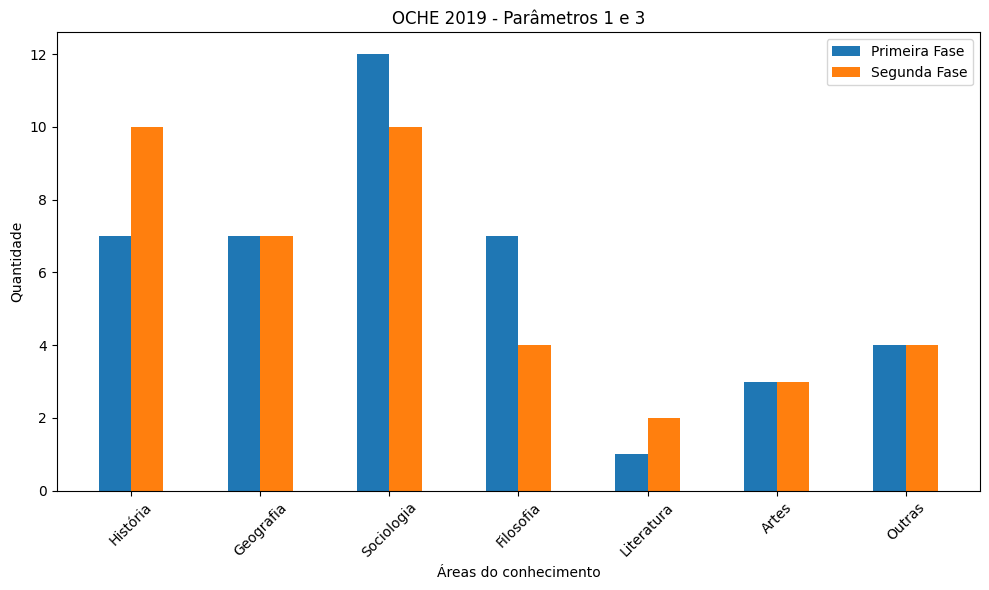

In [54]:
plotar_grafico([primeira_fase2019, segunda_fase2019], 2019)

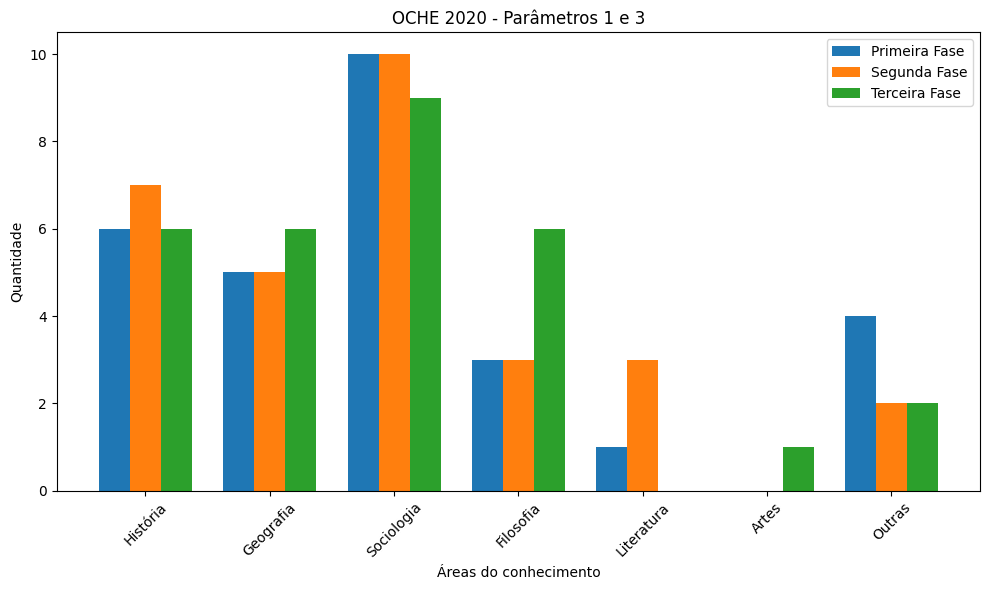

In [55]:
plotar_grafico([primeira_fase2020, segunda_fase2020, terceira_fase2020], 2020)

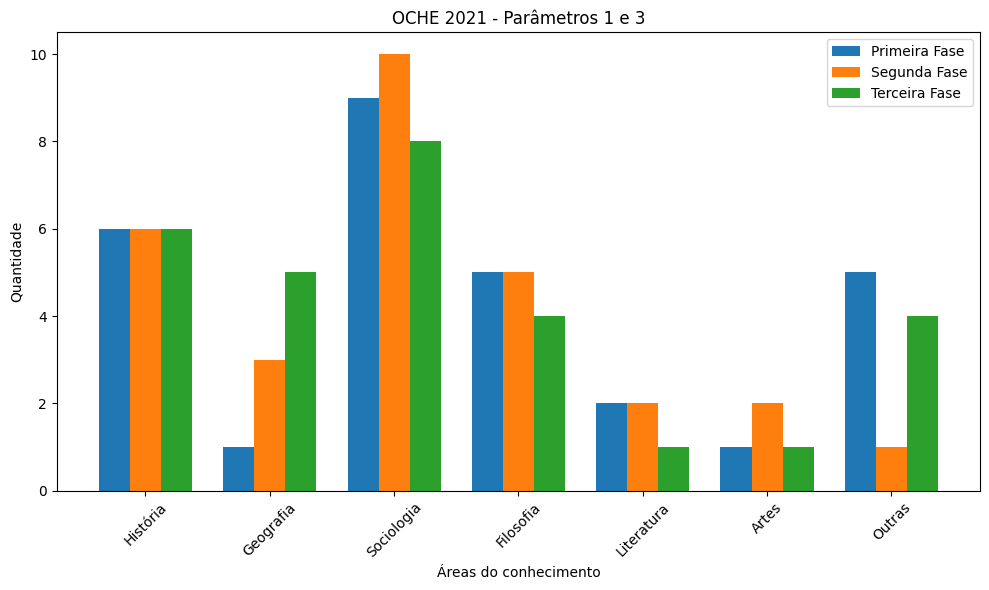

In [56]:
plotar_grafico([primeira_fase2021, segunda_fase2021, terceira_fase2021], 2021)

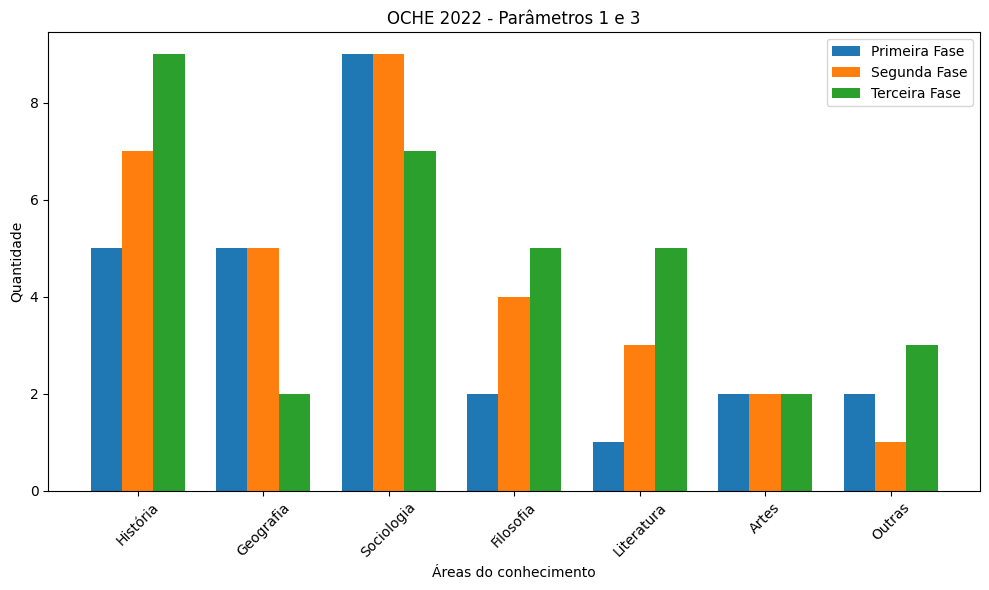

In [57]:
plotar_grafico([primeira_fase2022, segunda_fase2022, terceira_fase2022], 2022)

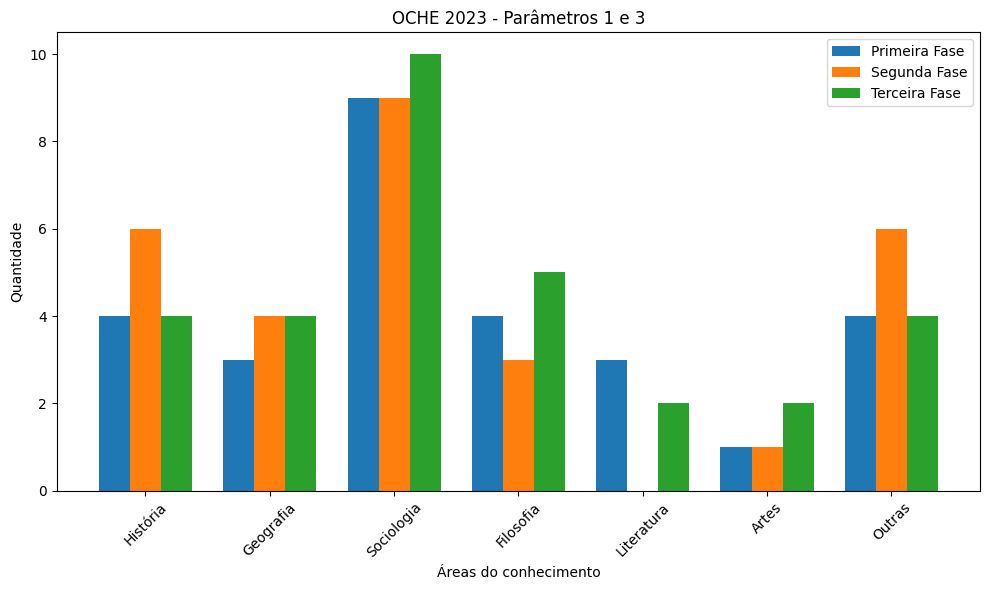

In [58]:
plotar_grafico([primeira_fase2023, segunda_fase2023, terceira_fase2023], 2023)